In [ ]:
!pip install pypianoroll

In [ ]:
#!/usr/bin/env python
#  -*- coding: UTF-8 -*-
"""
Purpose: read from arguments and parse into array of objects according to flags
"""

# ===== Standard Library =====
import logging
import json
from pathlib import Path

# ===== Public Library =====
import tensorflow as tf
from tensorflow.keras.layers import *
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
import pypianoroll

from IPython.core.interactiveshell import InteractiveShell

# ===== Self Defined =====
# import read_data


InteractiveShell.ast_node_interactivity = "all"

logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

'\nPurpose: read from arguments and parse into array of objects according to flags\n'

Num GPUs Available:  1


### Google Drive Mounting for Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Data

In [ ]:
inputs_path = Path('/content/drive/My Drive/Year 4/MA4550/inputs.npy') 
labels_path = Path('/content/drive/My Drive/Year 4/MA4550/labels.npy') 

In [ ]:
alls = Path('/content/drive/My Drive/Year 4/MA4550/all.npy')

In [ ]:
X = []


for i in alls:
    for j in range(0, i.shape[0], 120):
        if j + 120 <i.shape[0]:
            X.append(i[j:j+120])

PosixPath('/content/drive/My Drive/Year 4/MA4550/all.npy')

In [ ]:
inputs = np.load(inputs_path, allow_pickle=True)
labels = np.load(labels_path, allow_pickle=True)

## Visualise the data

In [ ]:
inputs.shape
labels.shape

(4344, 120, 128)

(4344, 120, 128)

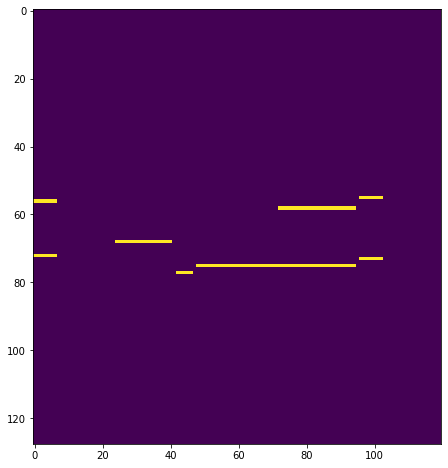

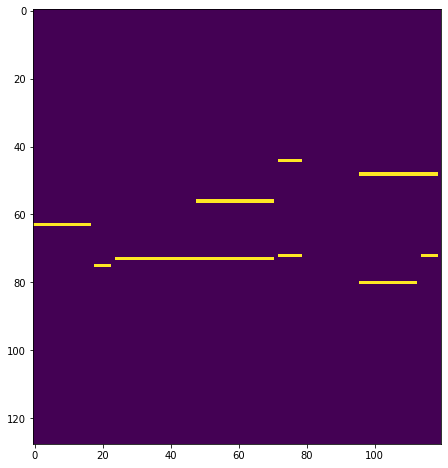

In [ ]:
plt.imshow(inputs[1].T)
plt.show()
plt.imshow(labels[1].T)

## Create the model

In [ ]:
model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    Input((120,128)),
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(120*128, activation='relu'),
])

model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels.reshape(-1, 120*128), test_size=0.33)

In [ ]:
model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=100
)

Epoch 1/100
91/91 [==============================] - 2s 22ms/step - loss: 83.1811 - mean_absolute_error: 1.8088 - val_loss: 81.3345 - val_mean_absolute_error: 1.7583
Epoch 2/100
91/91 [==============================] - 2s 20ms/step - loss: 79.2645 - mean_absolute_error: 1.7144 - val_loss: 81.0574 - val_mean_absolute_error: 1.8025
Epoch 3/100
91/91 [==============================] - 2s 20ms/step - loss: 76.8175 - mean_absolute_error: 1.6490 - val_loss: 80.3889 - val_mean_absolute_error: 1.6947
Epoch 4/100
91/91 [==============================] - 2s 21ms/step - loss: 74.8878 - mean_absolute_error: 1.5824 - val_loss: 80.5337 - val_mean_absolute_error: 1.7220
Epoch 5/100
91/91 [==============================] - 2s 20ms/step - loss: 73.1701 - mean_absolute_error: 1.5185 - val_loss: 80.2505 - val_mean_absolute_error: 1.6465
Epoch 6/100
91/91 [==============================] - 2s 20ms/step - loss: 70.3988 - mean_absolute_error: 1.4484 - val_loss: 79.9739 - val_mean_absolute_error: 1.6244
Epoc

## Predict

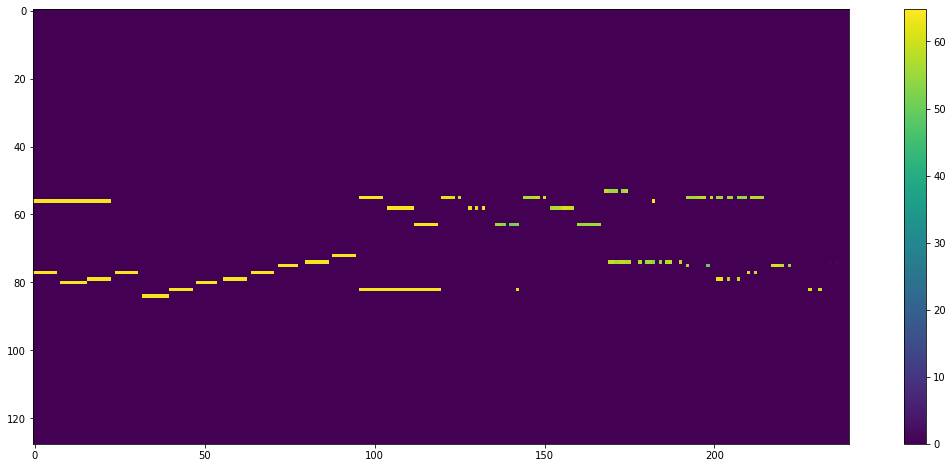

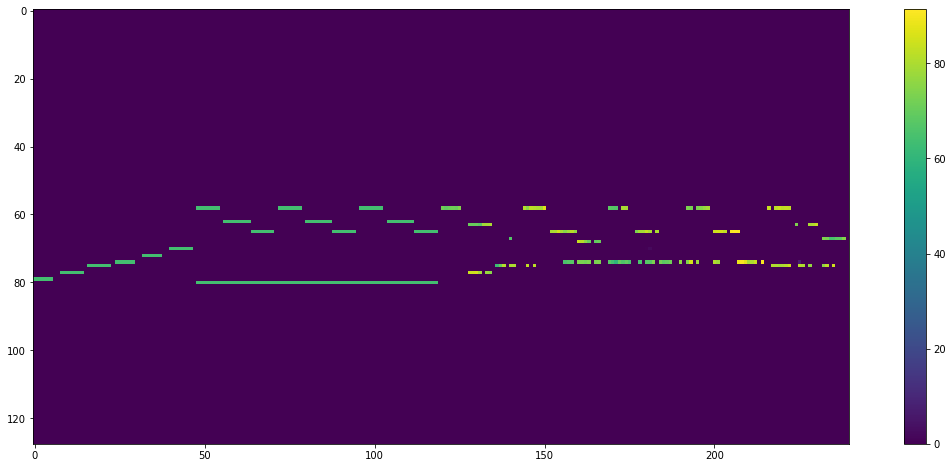

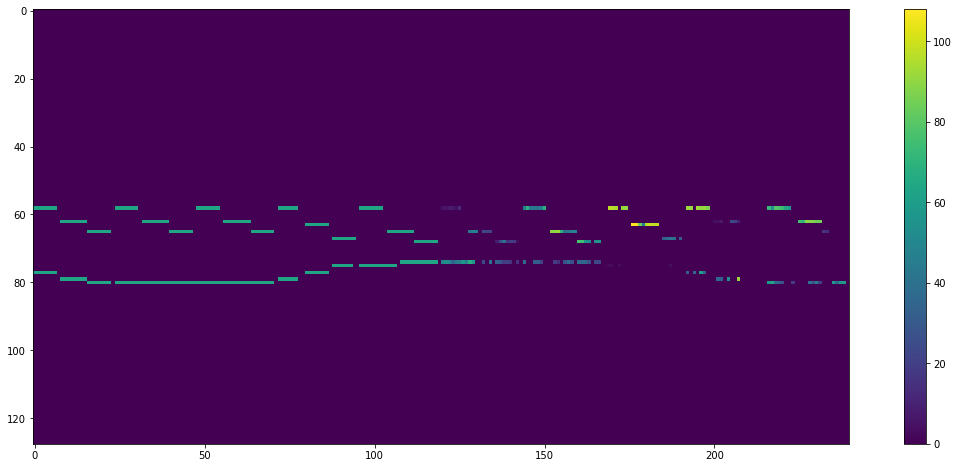

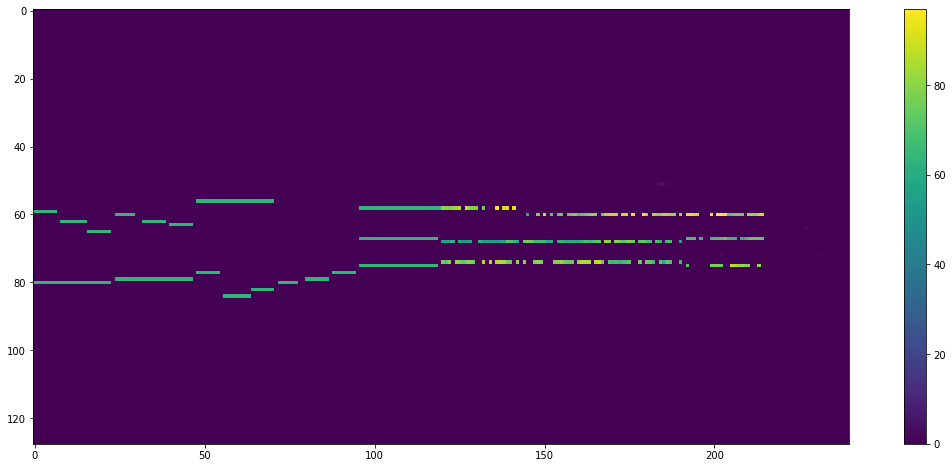

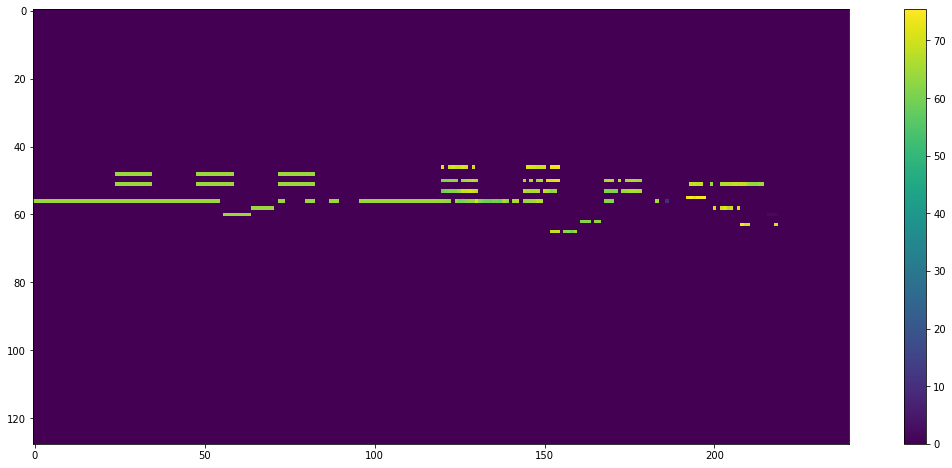

In [ ]:
predict_input_index = 9

for predict_input_index in range(10,15):
    c = plt.imshow(
        np.vstack(
            [inputs[predict_input_index], model.predict(inputs[predict_input_index:predict_input_index+1]).reshape(120,128)]
        ).T
    )
    plt.colorbar(c)
    plt.show()


## Output Matrix into MiDi

In [ ]:
!zip target.zip *.h5 *.png

  adding: discriminator_model_010.h5 (deflated 10%)
  adding: discriminator_model_020.h5 (deflated 10%)
  adding: discriminator_model_030.h5 (deflated 10%)
  adding: discriminator_model_040.h5 (deflated 10%)
  adding: discriminator_model_050.h5 (deflated 10%)
  adding: discriminator_model_060.h5 (deflated 10%)
  adding: discriminator_model_070.h5 (deflated 10%)
  adding: discriminator_model_080.h5 (deflated 10%)
  adding: discriminator_model_090.h5 (deflated 10%)
  adding: discriminator_model_100.h5 (deflated 10%)
  adding: generator_model_010.h5 (deflated 8%)
  adding: generator_model_020.h5 (deflated 8%)
  adding: generator_model_030.h5 (deflated 8%)
  adding: generator_model_040.h5 (deflated 8%)
  adding: generator_model_050.h5 (deflated 7%)
  adding: generator_model_060.h5 (deflated 7%)
  adding: generator_model_070.h5 (deflated 7%)
  adding: generator_model_080.h5 (deflated 7%)
  adding: generator_model_090.h5 (deflated 7%)
  adding: generator_model_100.h5 (deflated 7%)
  adding: 

In [ ]:
def check_data_shape(data):

    if len(data.shape) != 2 and data.shape[1] != 128:
        raise ValueError('Data shape should be (None, 128)')


def gen_midi_file(data, loc=Path('/content/result.mid')):
    check_data_shape(data)
    plt.imshow(data.T)
    new_track = pypianoroll.BinaryTrack(
        loc.stem, is_drum=False, program=0, pianoroll=data
    )
    multitrack = pypianoroll.Multitrack(
        loc.stem, resolution=24, tracks=[new_track]
    )
    pypianoroll.to_pretty_midi(multitrack)\
        .write(loc.open('wb'))




In [ ]:
np.vstack(
            [inputs[predict_input_index], model.predict(inputs[predict_input_index:predict_input_index+1]).reshape(120,128)]
        ).shape

NameError: ignored

In [ ]:

def recursively_predict(model, data):
    
    check_data_shape(data)

    next_sequence = model.predict(np.array([data]))
    


recursively_predict(
    model,
    inputs[0]
)


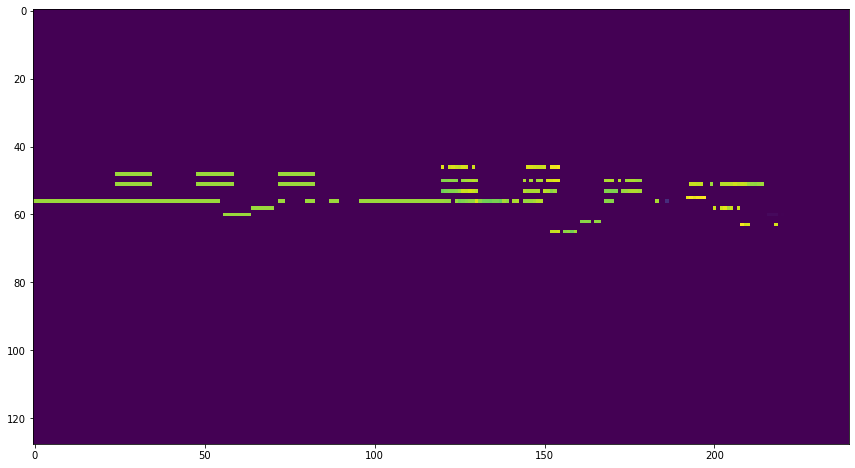

In [ ]:
plt.imshow(np.vstack(
            [inputs[predict_input_index], model.predict(inputs[predict_input_index:predict_input_index+1]).reshape(120,128)]
        ).T)

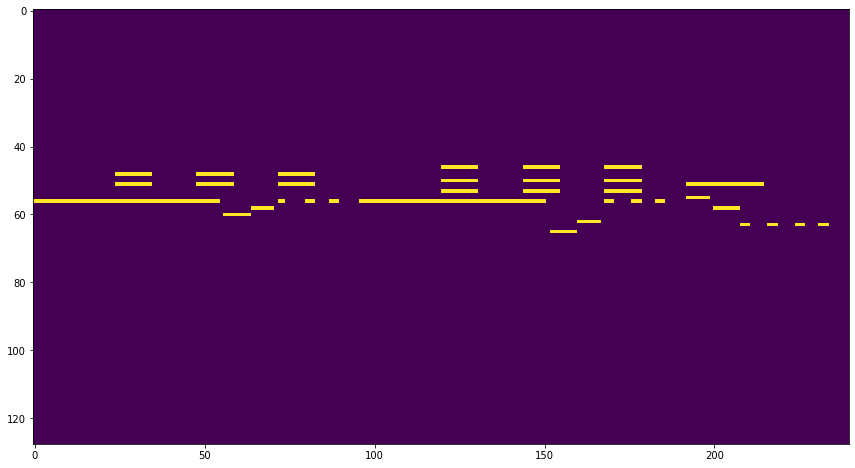

In [ ]:
gen_midi_file(np.vstack(
            [inputs[predict_input_index], labels[predict_input_index]]
        ))

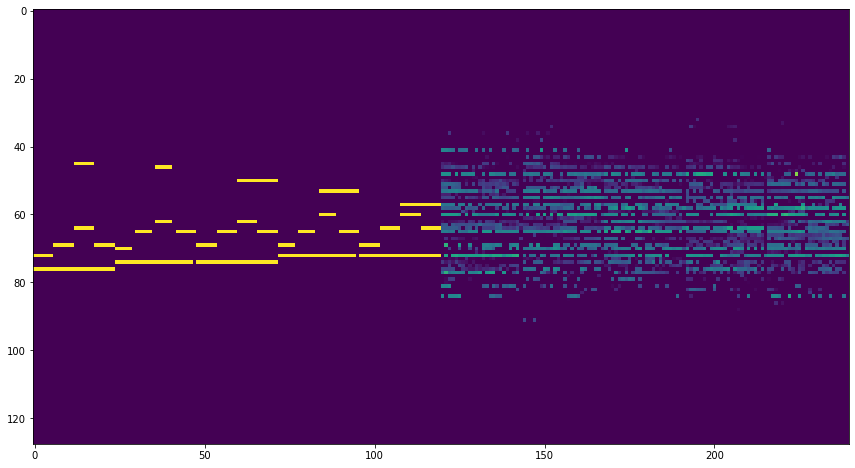

In [ ]:
predict_input_index = 6
gen_midi_file(np.vstack(
            [X_test[predict_input_index], model.predict(X_test[predict_input_index:predict_input_index+1]).reshape(120,128)]
        ).astype(np.float64))

In [ ]:
X_train.shape

(2910, 120, 128)

## GAN

In [ ]:
model = tf.keras.models.load_model('/content/models/generator_model_060.h5')

2021-04-22 13:34:24 WARNING  No training configuration found in the save file, so the model was *not* compiled. Compile it manually.


In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint


Adam = tf.keras.optimizers.Adam
Sequential = tf.keras.models.Sequential
 
# define the standalone discriminator model
def define_discriminator(in_shape=(120,128,1)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
 
# define the standalone generator model
def define_generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 64 * 15 *16
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((15, 16, 64)))
    # upsample to 14x14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 14x14
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 28x28
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    model.summary()
    return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add the discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
 
# load and prepare mnist training images
def load_real_samples():
    # load mnist dataset
    trainX = np.vstack([inputs, labels])
    # expand to 3d, e.g. add channels dimension
    X = expand_dims(trainX, axis=-1)
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [0,1]
    X = X / 64.0
    return X
 
# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, 1))
    return X, y
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y
 
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    plt.savefig(filename)
    plt.close()
 
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # save plot
    save_plot(x_fake, epoch)
    # save the generator model tile file
    filename = 'generator_model_%03d.h5' % (epoch + 1)
    g_model.save(filename)
    filename = 'discriminator_model_%03d.h5' % (epoch + 1)
    d_model.save(filename)
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
 
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = model
# define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/33, d=0.692, g=0.693
>1, 2/33, d=0.686, g=0.689
>1, 3/33, d=0.681, g=0.686
>1, 4/33, d=0.679, g=0.682
>1, 5/33, d=0.671, g=0.680
>1, 6/33, d=0.671, g=0.681
>1, 7/33, d=0.667, g=0.684
>1, 8/33, d=0.664, g=0.690
>1, 9/33, d=0.660, g=0.707
>1, 10/33, d=0.645, g=0.726
>1, 11/33, d=0.641, g=0.754
>1, 12/33, d=0.629, g=0.785
>1, 13/33, d=0.625, g=0.810
>1, 14/33, d=0.616, g=0.833
>1, 15/33, d=0.603, g=0.837
>1, 16/33, d=0.603, g=0.830
>1, 17/33, d=0.597, g=0.822
>1, 18/33, d=0.601, g=0.804
>1, 19/33, d=0.605, g=0.794
>1, 20/33, d=0.607, g=0.775
>1, 21/33, d=0.606, g=0.774
>1, 22/33, d=0.613, g=0.766
>1, 23/33, d=0.616, g=0.763
>1, 24/33, d=0.607, g=0.761
>1, 25/33, d=0.607, g=0.770
>1, 26/33, d=0.606, g=0.762
>1, 27/33, d=0.596, g=0.772
>1, 28/33, d=0.605, g=0.776
>1, 29/33, d=0.612, g=0.796
>1, 30/33, d=0.599, g=0.803
>1, 31/33, d=0.633, g=0.804
>1, 32/33, d=0.652, g=0.822
>1, 33/33, d=0.667, g=0.827
>2, 1/33, d=0.706, g=0.829
>2, 2/33, d=0.727, g=0.858
>2, 3/33, d=0.748, g=0.889
>2, 

In [ ]:
X_fake, _ = generate_fake_samples(g_model, latent_dim, 1)

In [ ]:
c = plt.imshow(g_model.predict(k).reshape(120,128).T > 1e-5)


NameError: ignored

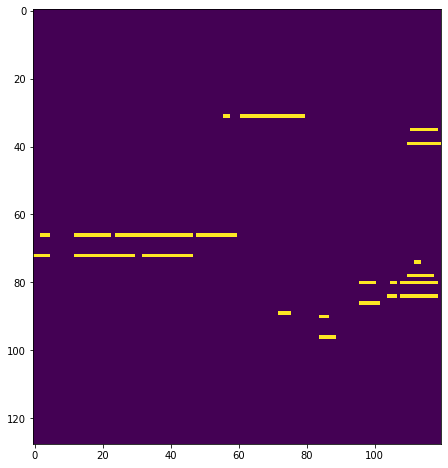

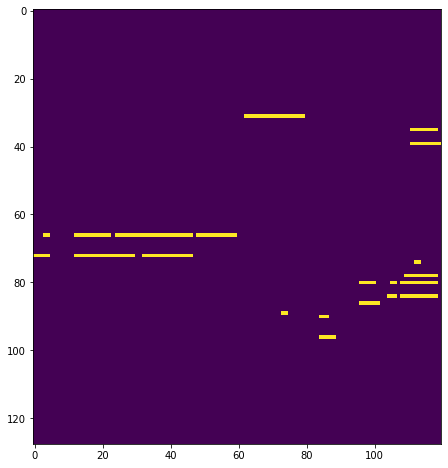

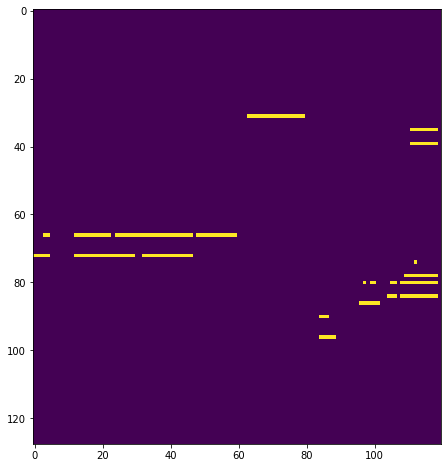

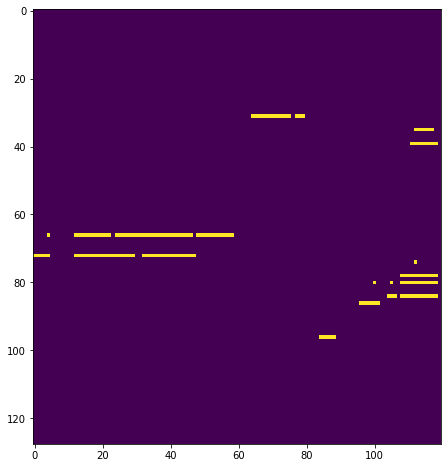

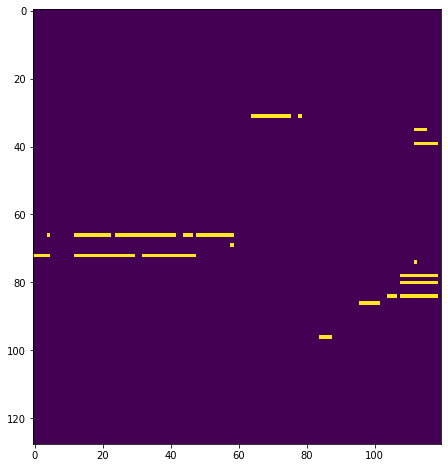

In [ ]:
k = randn(100)
k = k.reshape(1,100)
k[0][1] = 0.9
plt.imshow(g_model.predict(k).reshape(120,128))
gen_midi_file((g_model.predict(k).reshape(120,128) > 1e-3).astype(int) * 64, Path('/content/f1.mid'))
plt.show()
k[0][1] = 0.6
plt.imshow(g_model.predict(k).reshape(120,128))
gen_midi_file((g_model.predict(k).reshape(120,128) > 1e-3).astype(int) * 64, Path('/content/f2.mid'))
plt.show()
k[0][1] = 0.3
plt.imshow(g_model.predict(k).reshape(120,128))
gen_midi_file((g_model.predict(k).reshape(120,128) > 1e-3).astype(int) * 64, Path('/content/f3.mid'))
plt.show()
k[0][1] = 0
plt.imshow(g_model.predict(k).reshape(120,128))
gen_midi_file((g_model.predict(k).reshape(120,128) > 1e-3).astype(int) * 64, Path('/content/f4.mid'))
plt.show()
k[0][1] = -.5
plt.imshow(g_model.predict(k).reshape(120,128))
gen_midi_file((g_model.predict(k).reshape(120,128) > 1e-3).astype(int) * 64, Path('/content/f5.mid'))
plt.show()




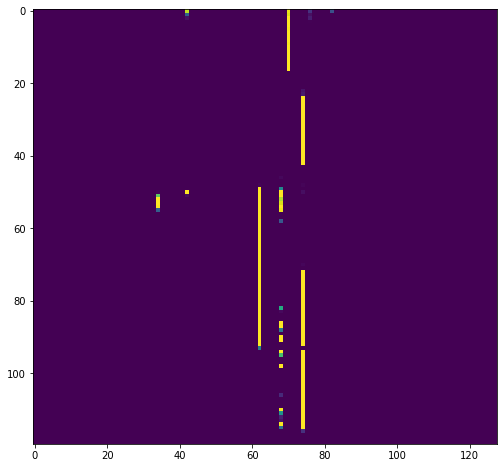

In [ ]:
plt.imshow(X_fake.reshape(120,128))

## Others =============

## Read Data function

In [ ]:
class read_data:
    @staticmethod
    def read_preprocessed_data():
        return np.load(open('data/all_sub.npy', 'rb'), allow_pickle=True)

In [ ]:
preprocessed_data = read_data.read_preprocessed_data()
windows = []
for idx, preprocessed_d in enumerate(preprocessed_data):
#     if idx == 2:
#         for timestep in preprocessed_d:
#             print(timestep.argmax())
#         break
    windows.append(
        WindowGenerator(
            input_width=120, label_width=120, shift=120,
            train_df=pd.DataFrame((preprocessed_d == 64).astype(int)),
            label_columns=np.arange(0, 128)
        )
    )


FileNotFoundError: ignored

In [ ]:

plt.imshow(preprocessed_data[2].T[:,:1000])

In [ ]:

multi_lstm_model.summary()

In [ ]:

OUT_STEPS = 120 
num_features = 128
tkl = tf.keras.layers
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tkl.Conv2D(32, (1, 1), activation='relu', input_shape=(OUT_STEPS, num_features, 1)),
    tkl.Dense(2048),
    tkl.Dense(1024),
    tkl.Dense(512),
    # tf.compat.v1.keras.layers.CuDNNLSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    # Shape => [batch, out_steps, features]
])

MAX_EPOCHS = 5
training = None
validation = None

def compile_and_fit(model, windows, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    window3 = windows[3]
    # windows = windows[:10]
    windows = preprocessed_data
    train_tmp = []
    train_y = []
    train_set = len(windows) * 3 // 4
    logging.info(f"Preparing data. (0/{len(windows)})")
    for i in range(1, train_set):
        if i % 10 == 0:
            logging.info(f"Prepared training data. ({i}/{len(windows)})")
        for j in range(0, len(windows[i]), OUT_STEPS // 2):
            if j + OUT_STEPS + OUT_STEPS < len(windows[i]):
                train_tmp.append((windows[i][j:j+OUT_STEPS]== 64).astype(int))
                train_y.append((windows[i][j+OUT_STEPS:j+OUT_STEPS+OUT_STEPS] == 64).astype(int))
        # train_tmp = train_tmp.concatenate(windows[i].train)
    training = train_tmp
    # print(training)
#     save(training, location='../data/tf-records/train')
    
    # validation = windows[train_set].train
    # for i in range(train_set + 1, len(windows)):
    #     if i % 10 == 0:
    #         logging.info(f"Prepared validation data. ({i}/{len(windows)})")
    #     validation = validation.concatenate(windows[i].train)
# #     save(validation, location='../data/tf-records/val')
# #     print(windows[0].train.shape)

    logging.info("Start training model.")
    history = model.fit(training, epochs=MAX_EPOCHS,
                        # validation_data=validation,
                        callbacks=[early_stopping])
    logging.info("Completed training.")
    return history

history = compile_and_fit(multi_lstm_model, windows)

json.dump(history.history, open("../res/res.json", 'w'))

val_performance = multi_lstm_model.evaluate(windows[2].train)
print(val_performance)



In [ ]:
training.shape

In [ ]:
skip_by = 703
s =120

predictions = multi_lstm_model(np.array([(preprocessed_data[1][skip_by:skip_by+s] == 64).astype(int)]))


In [ ]:
predictions = 

In [ ]:
predictions.shape

In [ ]:
plt.imshow((np.reshape(predictions[0], (s,128)) > 0.2).astype(int).T)
plt.show()
plt.imshow((preprocessed_data[1][skip_by+s:skip_by+s+s] == 64).astype(int).T)

In [ ]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)
def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

FeedBack.warmup = warmup
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape
def call(self, inputs, training=None):
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the lstm state
    prediction, state = self.warmup(inputs)

    # Insert the first prediction
    predictions.append(prediction)

    # Run the rest of the prediction steps
    for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

FeedBack.call = call
history = compile_and_fit(feedback_model, windows)

In [ ]:

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=pd.DataFrame(), val_df=pd.DataFrame(), test_df=pd.DataFrame(),
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])


def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels


WindowGenerator.split_window = split_window


def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32, )

    ds = ds.map(self.split_window)

    return ds


WindowGenerator.make_dataset = make_dataset


def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n + 1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if len(self.label_columns):
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')


WindowGenerator.plot = plot


@property
def train(self):
    return self.make_dataset(self.train_df)


@property
def val(self):
    return self.make_dataset(self.val_df)


@property
def test(self):
    return self.make_dataset(self.test_df)


@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result


WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example



In [ ]:


# def save(dataset, location='data/tf-records/'):
#     dataset = dataset.map(tf.io.serialize_tensor)
#     writer = tf.data.experimental.TFRecordWriter(location)
#     writer.write(dataset)
#     return location
#
#
# def load(tf_record='data/tf-records/'):
#     dataset = tf.data.TFRecordDataset(tf_record)
#     dataset = dataset.map(lambda x: tf.io.parse_tensor(x, tf.int64))
#     return dataset